In [1]:
import numpy as np
import gym

from keras import initializers
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Flatten, Input, Concatenate
from keras.optimizers import Adam

from rl.agents import DDPGAgent
from rl.agents import CEMAgent
from rl.memory import SequentialMemory
from rl.memory import EpisodeParameterMemory
from rl.random import OrnsteinUhlenbeckProcess

import matplotlib.pyplot as plt
%matplotlib inline

ENV_NAME = 'CoolingFin-v0'
gym.undo_logger_setup()


# Get the environment and extract the number of actions.
env = gym.make(ENV_NAME)
#np.random.seed(123)
#env.seed(123)
assert len(env.action_space.shape) == 1
nb_actions = env.action_space.shape[0]

# Next, we build a very simple model.
actor = Sequential()
#actor.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None)

actor.add(Flatten(input_shape=(1,) + env.observation_space.shape))
actor.add(Dense(260,kernel_initializer=initializers.RandomNormal(stddev=0.01)))
actor.add(Activation('relu'))
actor.add(Dense(100,kernel_initializer=initializers.RandomNormal(stddev=0.01)))
actor.add(Activation('relu'))
actor.add(Dense(50,kernel_initializer=initializers.RandomNormal(stddev=0.01)))
actor.add(Activation('relu'))
actor.add(Dense(nb_actions,kernel_initializer=initializers.RandomNormal(stddev=0.01)))
actor.add(Activation('linear'))
print(actor.summary())

action_input = Input(shape=(nb_actions,), name='action_input')
observation_input = Input(shape=(1,) + env.observation_space.shape, name='observation_input')
flattened_observation = Flatten()(observation_input)
x = Concatenate()([action_input, flattened_observation])
x = Dense(150)(x)
x = Activation('relu')(x)
x = Dense(90)(x)
x = Activation('relu')(x)
x = Dense(32)(x)
x = Activation('relu')(x)
x = Dense(1)(x)
x = Activation('linear')(x)
critic = Model(inputs=[action_input, observation_input], outputs=x)
#critic.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None)
print(critic.summary())

# Finally, we configure and compile our agent. You can use every built-in Keras optimizer and
# even the metrics!
memory = EpisodeParameterMemory(limit=100000, window_length=1)
random_process = OrnsteinUhlenbeckProcess(size=nb_actions, theta=150, mu=0, sigma=100)
agent = CEMAgent(model=actor, nb_actions=nb_actions, memory=memory,
               batch_size=50, nb_steps_warmup=2000, train_interval=50, elite_frac=0.05)
#agent.compile(Adam(lr=.00001, clipnorm=1.), metrics=['mae'])
agent.compile()

Using TensorFlow backend.
C:\Users\stevenbc\Anaconda3\lib\site-packages\gym\__init__.py:15: UserWarning: gym.undo_logger_setup is deprecated. gym no longer modifies the global logging configuration
  warnings.warn("gym.undo_logger_setup is deprecated. gym no longer modifies the global logging configuration")


WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 22)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 260)               5980      
_________________________________________________________________
activation_1 (Activation)    (None, 260)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               26100     
_________________________________________________________________
activation_2 (Activation)    (None, 100)               0         
___

Training for 60000 steps ...
Interval 1 (0 steps performed)
6000/6000 [==============================] - 167s 28ms/step - reward: 379.2918
5976 episodes - episode_reward: 380.815 [288.792, 5067.108] - mean_best_reward: 489.636

Interval 2 (6000 steps performed)
6000/6000 [==============================] - 163s 27ms/step - reward: 380.0637
6000 episodes - episode_reward: 380.064 [288.164, 457.362] - mean_best_reward: 451.298

Interval 3 (12000 steps performed)
6000/6000 [==============================] - 190s 32ms/step - reward: 379.9642
6000 episodes - episode_reward: 379.964 [294.660, 453.922] - mean_best_reward: 451.736

Interval 4 (18000 steps performed)
6000/6000 [==============================] - 193s 32ms/step - reward: 379.4388
6000 episodes - episode_reward: 379.439 [296.082, 456.509] - mean_best_reward: 432.016

Interval 5 (24000 steps performed)
6000/6000 [==============================] - 229s 38ms/step - reward: 379.8137
6000 episodes - episode_reward: 379.814 [285.205, 451

C:\Users\stevenbc\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


5999/6000 [============================>.] - ETA: 0s - reward: 380.16200


C:\Users\stevenbc\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


6000/6000 [==============================] - 226s 38ms/step - reward: 380.1536
6000 episodes - episode_reward: 380.154 [296.609, 451.206] - mean_best_reward: 450.856

Interval 9 (48000 steps performed)
5999/6000 [============================>.] - ETA: 0s - reward: 379.94130


C:\Users\stevenbc\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


6000/6000 [==============================] - 195s 32ms/step - reward: 379.9390
6000 episodes - episode_reward: 379.939 [290.715, 457.010] - mean_best_reward: 430.957

Interval 10 (54000 steps performed)
6000/6000 [==============================] - 207s 35ms/step - reward: 380.6496
done, took 2032.511 seconds


C:\Users\stevenbc\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


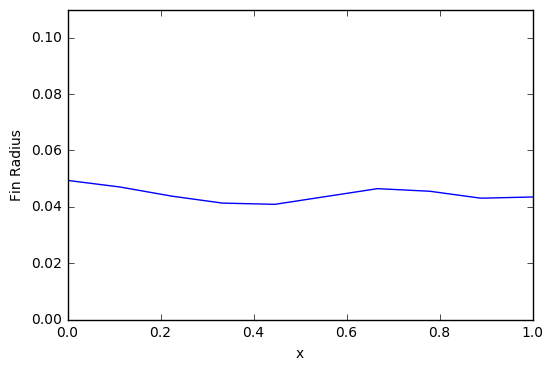

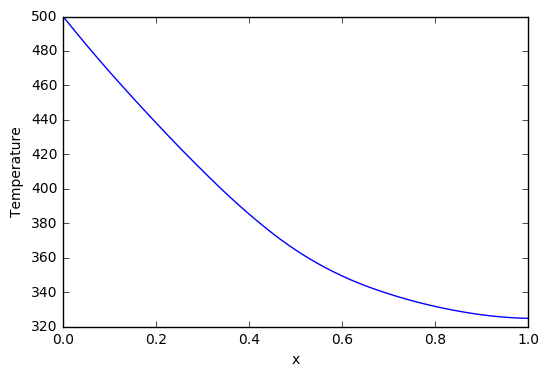

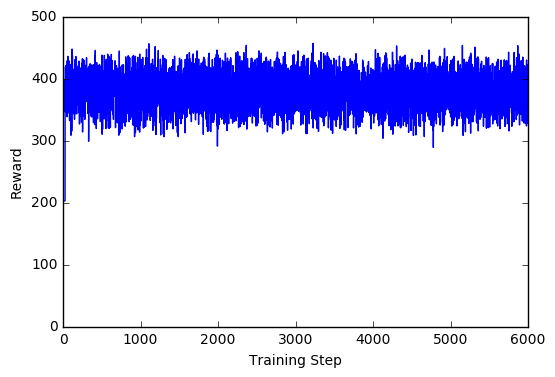

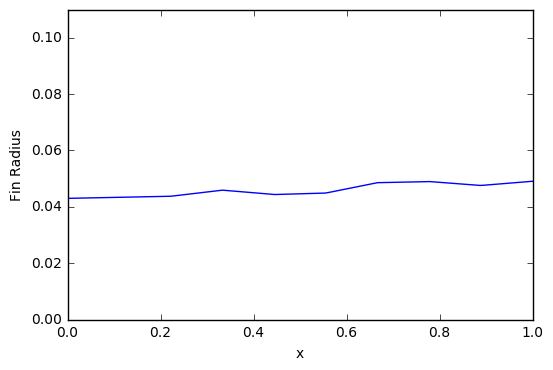

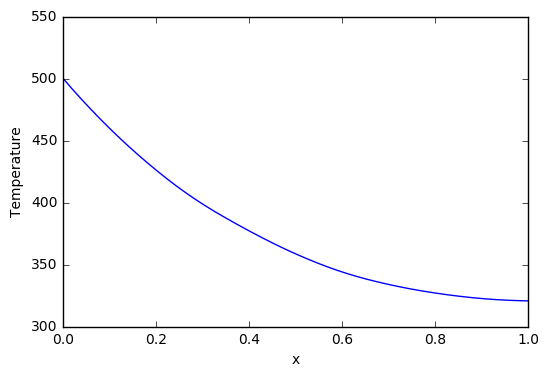

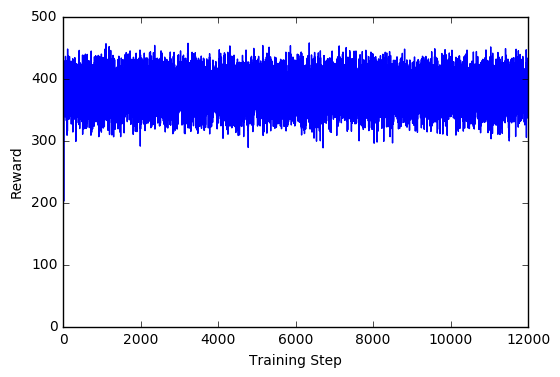

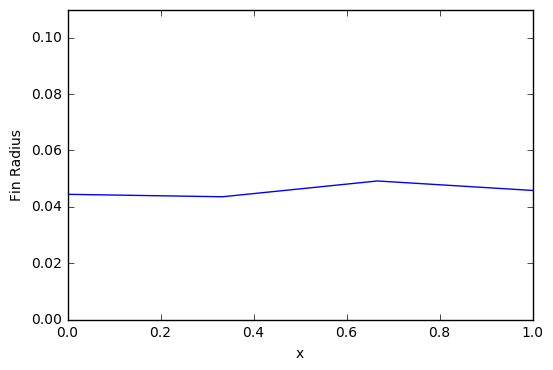

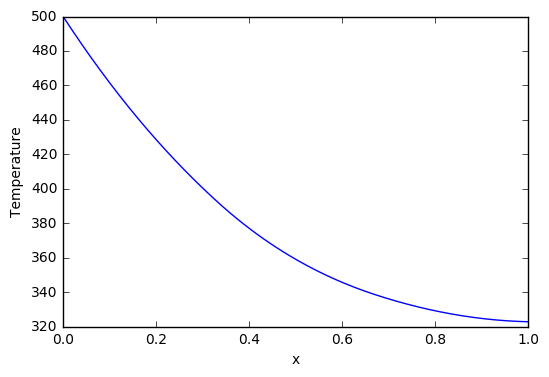

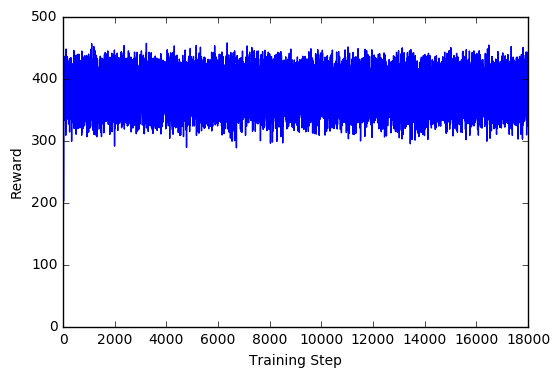

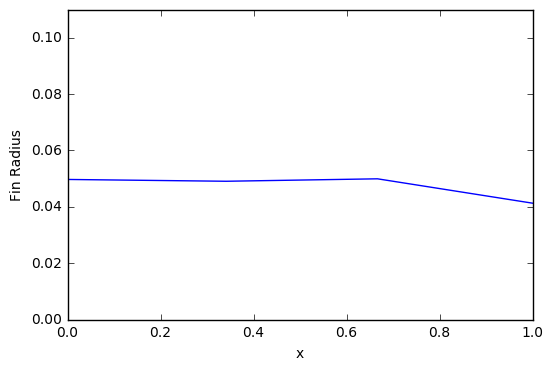

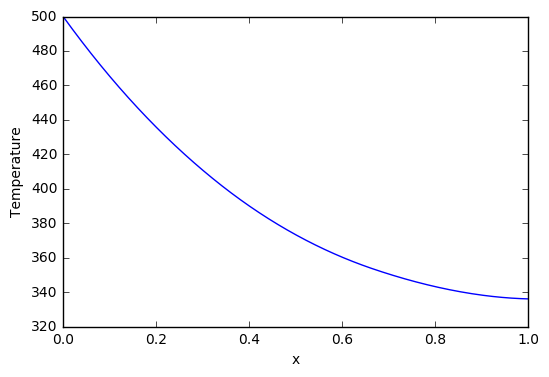

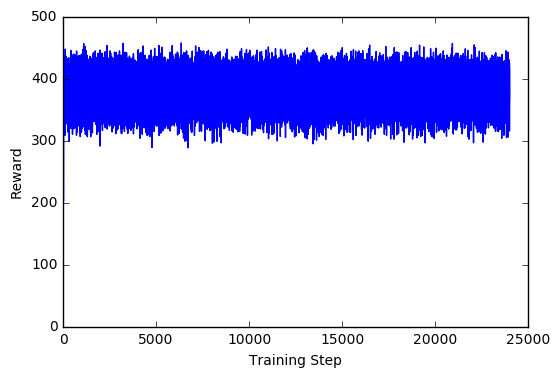

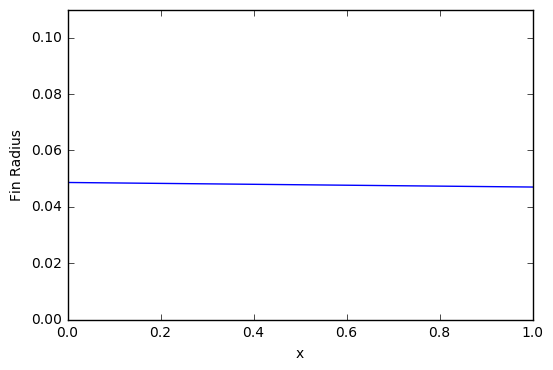

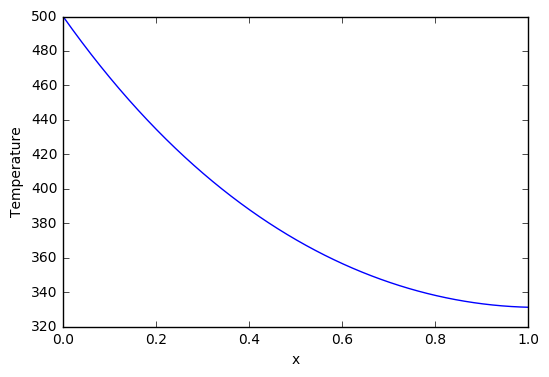

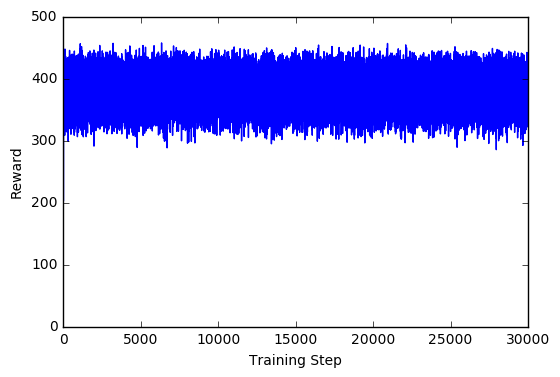

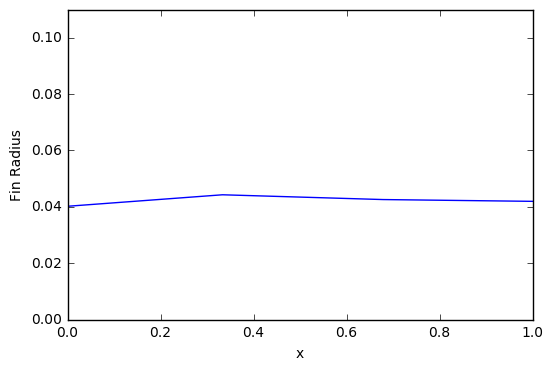

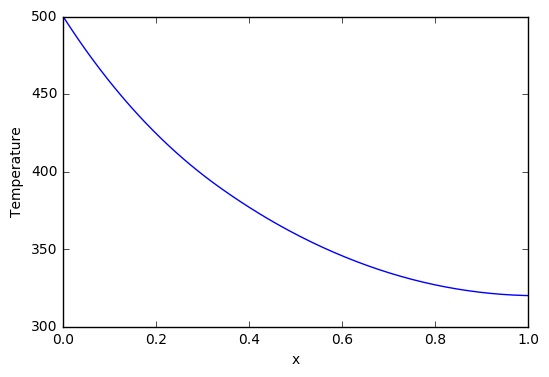

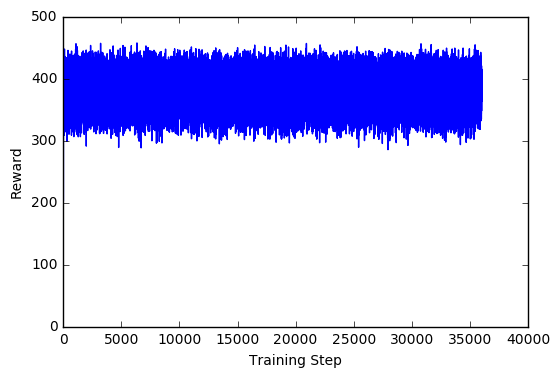

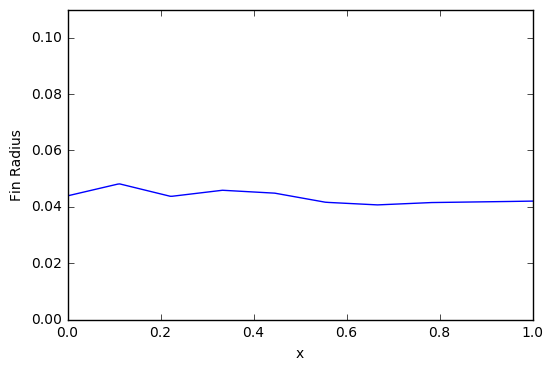

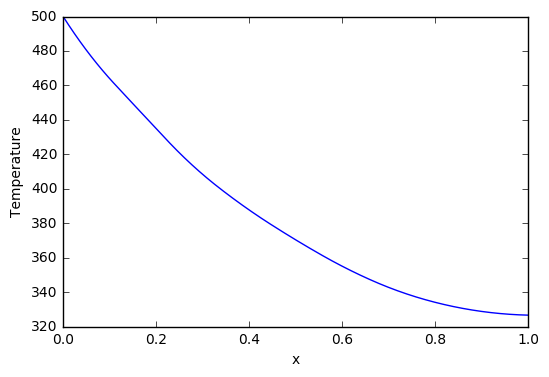

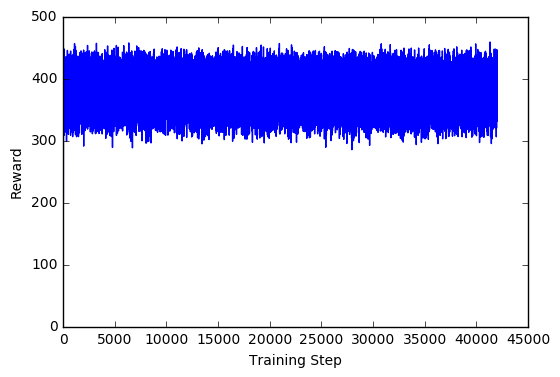

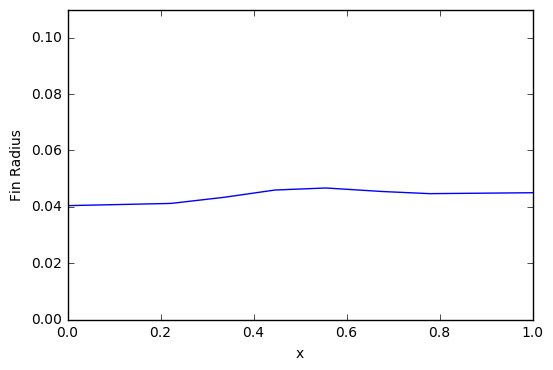

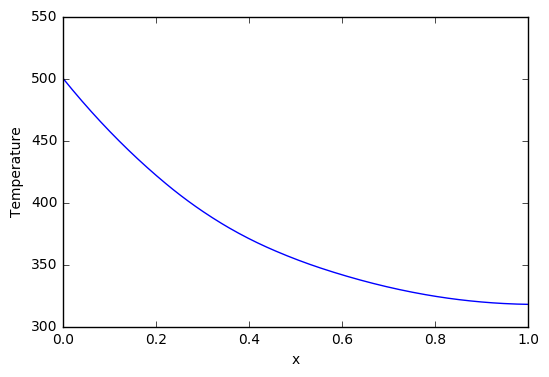

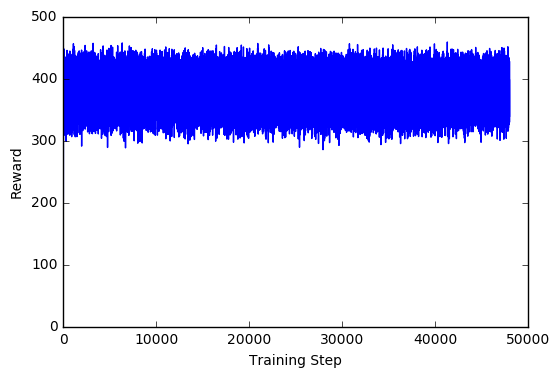

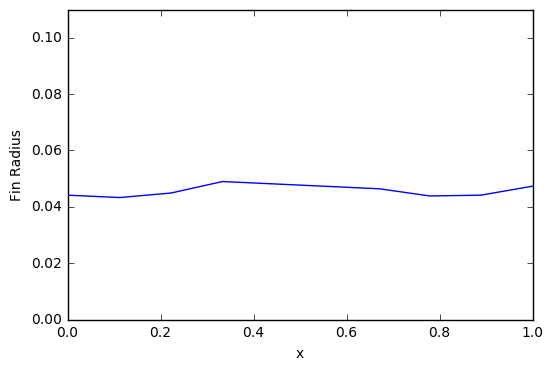

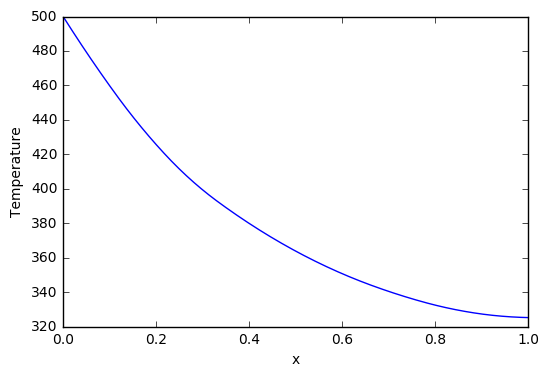

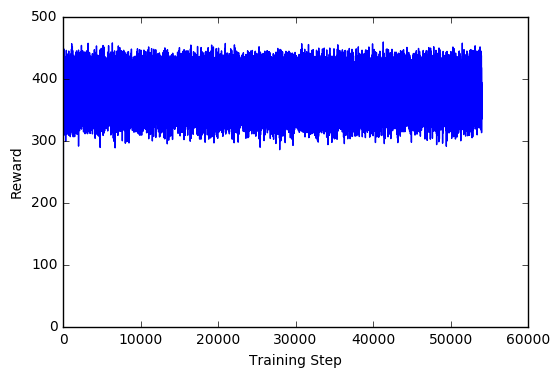

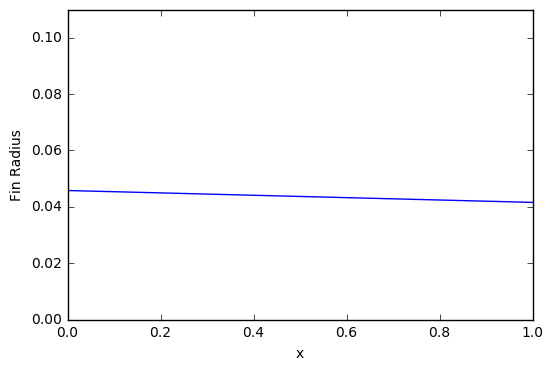

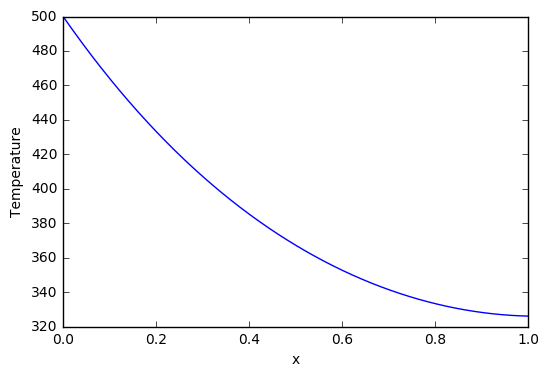

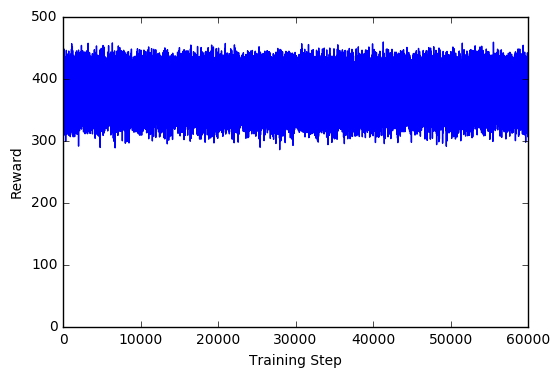

In [2]:
# Okay, now it's time to learn something! We visualize the training here for show, but this
# slows down training quite a lot. You can always safely abort the training prematurely using
# Ctrl + C.
agent.fit(env, nb_steps=60000, log_interval=6000,visualize=False, verbose=1, nb_max_episode_steps=50)

# After training is done, we save the final weights.
agent.save_weights('ddpg_{}_weights.h5f'.format(ENV_NAME), overwrite=True)

In [3]:
# Finally, evaluate our algorithm for 5 episodes.
agent.test(env, nb_episodes=2, visualize=False, nb_max_episode_steps=10)

Testing for 2 episodes ...
[  2.00000000e-02   2.00000000e-02   2.00000000e-02   2.00000000e-02
   2.00000000e-02   2.00000000e-02   2.00000000e-02   2.00000000e-02
   2.00000000e-02   2.00000000e-02   5.00000000e+02   4.35631880e+02
   3.85881121e+02   3.47662254e+02   3.18607991e+02   2.96911573e+02
   2.81227421e+02   2.70584619e+02   2.64320593e+02   2.62046858e+02
   3.28348026e+02   1.25663706e-03]
Episode 1: reward: 2026.843, steps: 10
[  2.00000000e-02   2.00000000e-02   2.00000000e-02   2.00000000e-02
   2.00000000e-02   2.00000000e-02   2.00000000e-02   2.00000000e-02
   2.00000000e-02   2.00000000e-02   5.00000000e+02   4.35631880e+02
   3.85881121e+02   3.47662254e+02   3.18607991e+02   2.96911573e+02
   2.81227421e+02   2.70584619e+02   2.64320593e+02   2.62046858e+02
   3.28348026e+02   1.25663706e-03]
Episode 2: reward: 2026.843, steps: 10


In [4]:
print(observation_input)
print(env.observation_space.shape)

Tensor("observation_input:0", shape=(?, 1, 22), dtype=float32)
(22,)


In [5]:
print(agent.nb_actions)
print(action_input)

10
Tensor("action_input:0", shape=(?, 10), dtype=float32)
